# Métricas

En las sesiones anteriores hemos descrito a los algoritmos de aprendizaje automático supervisados como funciones de mapeo entre unas variables independientes de entrada, $X$, y una variable objetivo de salida $y$. El objetivo de estas funciones de mapeo, $\hat{f}$, no es el de encontrar la función real subyacente a las observaciones, si no darnos una herramienta **útil** para predecir el valor esperado de la variable objetivo, $\hat{y}$, dado un nuevo set de  observaciones.

Hemos visto que tanto los modelos paramétricos (regresión lineal), como los no paramétricos (arbol de decisión), los modelos cambian su estado interno para ajustarse a los datos observados en base a la minimización de un coste asociado a las predicciones del modelo. Este proceso de aprendizaje, o entrenamiento, nos permite obtener el mejor estado interno para un modelo dado. Por ejemplo, en el caso de una regresión lineal, sería aquel modelo tipo $\hat{y} = \theta X$ donde $\theta$ nos minimiza el error cuadrático medio sobre la muestra.

Recordemos que nosotros no conocemos la función real a aproximar y, que dada la naturaleza p-dimensional de los datos, siendo $p$ el número de predictores, no será trivial averiguar la relación entre los predictores y la variable objetivo. Es natural entonces que nos preguntemos ¿es el modelo que he elegido?

La única forma de responder a esta pregunta es utilizando un metodo de comparación directa. Entrenar varios tipos de modelos y evaluar el rendimiento de esos modelos en base a una métrica que nos permita compararlos en base a la **finalidad** del problema a resolver.

En esta sesión trabajaremos sobre las métricas que nos permitiran evaluar y comparar distintos modelos.

---

# 1. Métricas

## 1.1 Metricas para problemas de regression

Las métricas más comunes en los problemas de regresión son el **error cuadrático** y el **error absoluto**, y sus distintas modificaciones.

### 1.1.2 Errores cuadráticos

El **error cuadrático (Squared Error)** de un valor predicho con respecto al valor real, se calcula cómo:

$$ SE = \sum_j\left[f(X_{j}) - y_j\right]^2$$


**Error cuadrático medio (Mean Squared Error)** Da una idea del error de nuestras predicciones dando más peso a los errores grandes.

$$ MSE = \frac{1}{m}\sum_j^m \left[f(X_{j \cdot}) - y_j\right]^2 $$

**Raiz del error cuadrático medio (Root Mean Square Error)** La raíz cuadrada del MSE produce el error de la raíz cuadrada de la media o la desviación de la raíz cuadrada media (RMSE o RMSD). Tiene las mismas unidades que la cantidad que estima. Para un estimador sin sesgo (bies), el RMSE es la raíz cuadrada de la varianza, es decir la desviación estandar.

$$ RMSE = \sqrt{\frac{1}{m}\sum_j^m \left[f(X_{j \cdot}) - y_j\right]^2} $$


>**Tip**
>
>A pesar de ser una de las métricas más utilizadas, tiene el inconveniente de ser sensible a los valores extremos (outliers). Cuando este comportamiento pueda suponer un problema, los **errores absolutos** pueden darnos una mejor medida de rendimiento.

## Preparación del entorno

In [1]:
import pandas as pd  ##
import numpy as np  ##
import seaborn as sns  ##
import matplotlib.pyplot as plt  ##

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set(rc={'figure.figsize':(12, 8)})

In [2]:
## Escribe una función que devuelva el MSE y el RMSE dados dos arrays de numpy

def MSE(x1, x2):
    """
    Returns the Root Mean Squared Error of the two input vectors
    """
    sq_error = np.square(x1 - x2)  ##
    mean_sq_error = np.mean(sq_error)  ##
    return mean_sq_error

def RMSE(x1, x2):
    """
    Returns the Root Mean Squared Error of two vectors. Depends on the MSE function
    """
    mse = MSE(x1, x2)
    root_mse = np.sqrt(mse)  ##
    return root_mse

In [3]:
## Utiliza la función del error cuadrático en las métricas de sklearn para crear la funcion de RMSE
from sklearn.metrics import mean_squared_error  ##

def RMSE_sk(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))  ##

### 1.1.3 Errores absolutos

El **error absoluto** (Absolute Error) se define cómo:

$$ AE = \sum_j \left|f(X_{j \cdot}) - y_j\right| $$

#### Error absoluto medio (Mean Absolute Error)

Es más robusto a los valores extremos y su interpretabilidad es más alta que la del RMSE ya que también está en las unidades de la variable a predecir con la ventaja de que el dato no ha sufrido ninguna transformación.

$$ MAE = \frac{1}{m} \sum_j^m \left|f(X_{j \cdot}) - y_j\right| $$

#### Error absoluto medio porcentual (Mean Average Percentage Error)

A pesar de su simpleza, presenta varios inconvenientes a la hora de usarlo de forma práctica. Por ejemplo, **no puede usarse cuando el valor de referencia es 0**. Además, **si se usa para elegir métodos predictivos seleccionará de forma sistemática un metodo que prediga valores bajos.**
[wiki](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)

$$ MAPE = \frac{1}{m} \sum_j^m \left|\frac{f(X_{j \cdot}) - y_j}{y_j}\right| $$


In [4]:
## Escribe una función que devuelva el MAE y el MAPE dados dos arrays de numpy
import numpy as np

def MAE(y_true, y_pred):
    """
    Returns de MAE of the two input vectors
    """
    return np.mean(np.abs(y_pred - y_true))  ##

def MAPE(y_true, y_pred):
    """
    Returns de MAPE of two vectors.
    """
    return np.mean(np.abs((y_pred - y_true) / y_true))  ##

### 1.1.4 Generalización

Las dos **métricas** expuestas anteriormente pueden considerarse como **distancias entre el vector de valores reales y el predicho**. De hecho, el RMSE corresponde a la **distancia euclidiana**, también conocida como norma $l_2$ o $\lVert{v}\rVert_2$.

Por otro lado, el MAE corresponde a la norma $l_1$ o $\lVert{v}\rVert_1$. A esta distancia se la conoce como **distancia de manhattan**, porque sólo se puede viajar de un bloque a otro de la ciudad a traves de calles ortogonales.

De forma general, una norma $l_k$ o $\lVert{v}\rVert_k$ se calcula:

$$\lVert{v}\rVert_k = \left(|v_0|^k + ...+ |v_m|^k \right)^\frac{1}{k}$$

El concepto de distancia será particularmente útil en los problemas de segmentación (aprendizaje no supervisado)


### 1.1.5 Coeficiente de determinación ($R^2$)

El coeficiente determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo. El valor más alto obtenible será 1, aunque hay casos en los que puede presentar valores negativos. De forma intuitiva, $R^2$ compara el "fit" de nuestro modelo al de una linea recta horizontal. Dada una regresión lineal simple, un $R^2$ negativo sólo es posible cuando la ordenada en el origen o la pendiente están restringidas de forma que el mejor modelo es peor que una linea horizontal.

Si representamos la **varianza de la variable dependiente** por $\sigma^{2}$ y la **varianza residual** por $\sigma _{r}^{2}$, el coeficiente de determinación viene dado por la siguiente ecuación:

$$ R^{2}=1- \frac{\sigma_{r}^{2}}{\sigma ^{2}}$$


Siendo $\hat{y}_i$ el valor predicho de la muestra i y $y_i$ el valor real, el $R^2$ estimado sobre $n_{\text{muestras}}$ se define como:

$$ R^2(y, \hat{y}) = 1 - \frac{\sum_{i=0}^{n_{\text{samples}} - 1} (y_i - \hat{y}_i)^2}{\sum_{i=0}^{n_\text{samples} - 1} (y_i - \bar{y})^2}$$
donde $$ \bar{y} =  \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}} - 1} y_i.$$


In [5]:
### Crea una función que dados dos vectores calcule la función de R²
def r_square(y_true, y_pred):
    var_res = ((y_true - y_pred)**2).sum()
    var_y = ((y_true - y_true.mean())**2).sum()
    return 1 - var_res/var_y

In [6]:
### Utiliza la función implementada en sklearn y compara los resultados
from sklearn.metrics import r2_score ##

y_true = np.random.random(10)
y_pred = np.random.random(10)

if r2_score(y_true, y_pred) == r_square(y_true, y_pred): ##
    print('OK')

OK


#### 1.1.5.1 Consideraciones R²

1. R² no puede determinar si los coeficientes y las predicciones tienen bies: Hay que checkear los residos --> Si observamos patrones en los plots de residuos es indicativo de un mal ajuste a pesar de un R2 elevado

1. Cada vez que añadimos un predictor a un modelo, el R² aumenta aunque sea por suerte, pero nunca decrece. Por consiguiente, un modelo con muchos terminos puede parecer mejor simplemente por el hecho de tener más terminos. Para prevenir este efecto, podemos usar el **adjusted R²**, una versión modificada que se ajusta al número de predictores en el modelo. De ésta forma, el R² solo aumenta si el nuevo término mejora el modelo más que por mera suerte. Siempre es más bajo que el R²

$$\text{adjusted}~R^2 = \bar{R}^2 = 1 - \frac{N-1}{N-k-1}(1-R^2)$$


n – numero de observaciones

k – numero de parametros

In [7]:
### crea una función que devuelva el R² ajustado

def adj_r2_score(model, y_true, y_hat):
    r2 = r2_score(y_true, y_hat)
    n = y_true.shape[0]
    k = model.coef_.shape[0]
    num = n - 1
    den = n - k - 1
    return 1 - ((num) / (den) * (1 - r2))
    

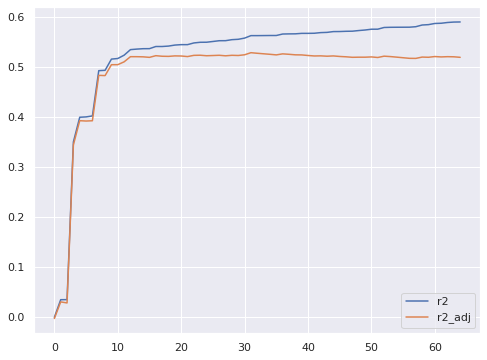

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

## load linear regression ML model
from sklearn.linear_model import LinearRegression ##

## load the tool to construct polynomial features
from sklearn.preprocessing import PolynomialFeatures ##

## load diabetes dataset
from sklearn.datasets import load_diabetes

data = load_diabetes()  ##
poly = PolynomialFeatures(2)  ##
X_poly = poly.fit_transform(data.data)

LR = LinearRegression()
y = data.target

r2 = []
r2_adj = []
## create a for loop training and predicting the y and calculating the r2 and r2 adj for each number of
## features
for n_cols in range(1, X_poly.shape[1]):
    X = X_poly[:, :n_cols]
    LR.fit(X, y)  ##
    y_pred = LR.predict(X)  ##
    r2.append(r2_score(y, y_pred))
    r2_adj.append(adj_r2_score(LR, y, y_pred))

plt.figure(figsize=(8,6))
plt.plot(r2, label='r2')
plt.plot(r2_adj, label='r2_adj')
plt.legend(loc='lower right')
plt.show()

## 1.2 Metricas para problemas de clasificación

Cuando hablamos de problemas de clasificación, existe una gran variedad de métricas que nos permiten determinar cómo de bueno es nuestro clasificador. La elección de la métrica vendrá determinada por:

1. El tipo de predicción: si es una clase o la **probabilidad** de pertenecer a una clase
2. Si se trata de un problema balanceado o no

### 1.2.1 Matriz de confusión

Antes de empezar, consideremos el caso básico de una clasificación binaria en el que intentamos predecir una clase. Imagina que hemos entrenado un modelo y realizado una serie de predicciones. Es fácil entonces crear una tabla que contenga la siguiente información.

|                      | Observación: Perro                | Observación: Gato                 |
|--------------------- |:---------------------------------:|:---------------------------------:|
| **Predicción Perro** |<span style='color:green'>25</span>|<span style='color:red'>3</span>   |
| **Predicción Gato**  |<span style='color:red'>9</span>   |<span style='color:green'>19</span>|

Esta tabla se conoce cómo matriz de confusión (en ingles, confusion matrix) y es facilmente extendible a problemas de clasificación de varias categorías.

Lo que nos dice esta matriz de forma simplificada es:

1. En total tenemos 25+3+9+19 = 56 muestras sobre las que hemos realizado predicciones
1. De las 56, 25 + 9 = 34 pertenecen a la clase *perro* y 3+19 = 21 pertenecen a la clase *gato*
1. De los 34 *perros*, hemos predicho bien la categoría en 25 casos y mal en 9.
1. De los 21 *gatos*, hemos predicho bien la categoría gato en 19 casos y mal en 3

|                         | Observation Positive     | Observation Negative    |
|-------------------------|:------------------------:|:-----------------------:|
| **Prediction Positive** |     True Positive        | False Positive (Type I) |
| **Prediction Negative** | False Negative (Type II) |     True Negative       |

A partir de esta matriz, se construyen la mayoría de métricas asociadas con los problemas de clasificación.

### 1.2.2 Métricas según clase predicha
**Accuracy**

De forma general, ¿cuantas veces predigo la clase correcta? La más común y muchas veces, la más susceptible a darnos un clasificador erroneo, sobre todo en sets de datos no balanceados.

$$Accuracy = \frac{TP+TN}{total} = \frac{25+19}{56} \sim 0.786$$

**Error Rate**

De similar modo, ¿Cuántas veces me equivoco?

$$ Error Rate = 1 - Accuracy = \frac{FP+FN}{total} = \frac{9+3}{56} \sim 0.214 $$

**Recall (sensitivity)**

Cuando es *perro*, ¿cuantas veces predecimos *perro*?

$$ Recall = \frac{TP}{actual Trues} = \frac{TP}{TP + FN} = \frac{25}{25 + 9} \sim 0.735 $$

**Specificity**

Cuando es *gato*, ¿cuántas veces predecimos *gato*?

$$ Specificity = \frac{TN}{actual Falses} = \frac{TN}{TN + FP} = \frac{21}{19 + 9} \sim 0.75 $$

**Precision**

Cuando predecimos *perro*, cuantas veces es correcto?

$$ Precision = \frac{TP}{predicted Trues} = \frac{TP}{TP + FP} = \frac{25}{25 + 3} \sim 0.892 $$

**F1-score**

A menudo es conveniente **combinar la precision y el recall en una sola métrica** para comparar de forma sencilla dos clasificadores. En vez de calcular una media de la precisión y el recall, se calcula su **media harmónica**. De esta forma se da más peso a los valores bajos por lo que sólo se conseguirá un F1-score alto si ambas, Precision y Recall, son altas.

$$F_1= \frac{1}{\frac{1}{precision} + \frac{1}{recall}} = 2 \times \frac{precision \times recall}{precision + recall} = \frac{TP}{TP + \frac{FN + FP}{2}} $$


Vamos a ver un ejemplo de estas métricas. Para ello, usaremos los datos de vinos que vienen por defecto en la libreria de sklearn.

In [73]:
## Cargamos los datos de vinos
import pandas as pd
from sklearn.datasets import load_wine

np.random.seed(42)

data = load_wine()

## Create dataframe with data.data
df = pd.DataFrame(data.data)  ##
df.columns = data.feature_names
df['y'] = data.target

# Vamos a forzar solo que distinga entre la clase 0 y las demas
# Asigna a la variable 'y' la clase 0 cuando sea 0 y 1 en caso contrario
df['y'] = df['y'].where(df['y']==1, 0)
#df['y'] = np.where(df['y']==0, 0, 1)  ##
# importa el modulo de regresión logística
from sklearn.linear_model import LogisticRegression  ##

# importa el modulo de StratifiedKfold
from sklearn.model_selection import StratifiedKFold  ##

# importa el modulo de cross_val_predict
from sklearn.model_selection import cross_val_predict  ##

#importa el modulo necesario para realizar la partición entre train y test
from sklearn.model_selection import train_test_split  ##

# divide el dataset en train y test con un tamaño de test del 10% de los datos
X_train, X_test, y_train, y_test = train_test_split(df.drop(['y'], axis = 1), df['y'], test_size=0.1)  ##

# usa el StratifiedKFold para dividir el X_train en 5 partes.
kfold = StratifiedKFold(n_splits=5)  ## 30 ??

# instancia una regresión logistica
clf = LogisticRegression(solver='newton-cg')

# usa la función de cross_val_predict para entrenar y evaluar la regresión logística usando el StratifiedKFold
y_pred = cross_val_predict(clf, X_train, y_train, cv=kfold)

Una vez hemos realizado las predicciones, veamos cómo se comporta calculando las métricas comentadas anteriormente

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)

In [75]:
def plot_confusion_matrix(cm, labels=['0', '1']):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues')

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    if labels:
        ax.xaxis.set_ticklabels(labels)
        ax.yaxis.set_ticklabels(labels)

    ax.set_title('Confusion Matrix')

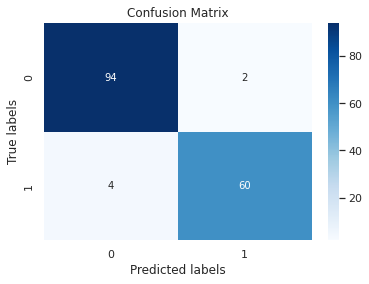

In [76]:
plot_confusion_matrix(cm)

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_train, y_pred))
print("Precision:", precision_score(y_train, y_pred))
print("Recall:", recall_score(y_train, y_pred))
print("F1:", f1_score(y_train, y_pred))

Accuracy: 0.9625
Precision: 0.967741935483871
Recall: 0.9375
F1: 0.9523809523809523


**Otra funcionalidad que nos da una visión panorámica de nuestro clasificador es...**

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        96
           1       0.97      0.94      0.95        64

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160



### 1.2.3 Metricas para predicciones probabilisticas

Muchas veces no solo nos conformaremos con predecir una clase, si no que tendremos que predecir la *probabilidad* de pertenecer a una clase.

Varios métodos de clasificación de ML son aptos para este tipo de tarea. En sklear, además del método `clf.predict()` de algunos estimadores, tendremos el método `clf.predict_proba()`, que nos devolverá la probabilidad de pertenecer a cada una de las clases.

En realidad, un clasificador calcula la probabilidad y, en base a un umbral, decide la clase a la que pertenece.
Por defecto, los algoritmos de ML de sklearn tienen un umbral de 0.5. Es decir, si la probabilidad de pertenecer a una clase es mayor que 0.5, le asigna la etiqueta de esa clase.

**¿Qué implica esto?**

Básicamente, implica que si jugamos con el umbral de decisión para un predictor probabilístico, podemos alterar las métricas de performance a nuestra voluntad...

### Precision vs recall

In [79]:
from ipywidgets import interact

x = np.linspace(0,1,1000)
y = np.random.binomial(1, x)

def plot_threshold(threshold=0.5):
    plt.figure(figsize=(10, 6))
    true_pos = (x > threshold) * (y > 0)
    plt.plot(x[true_pos], y[true_pos], '.', label="True Positive")
    false_pos = (x > threshold) * (y == 0)
    plt.plot(x[false_pos], y[false_pos], '.', label="False Positive")
    true_neg = (x <= threshold) * (y == 0)
    plt.plot(x[true_neg], y[true_neg], '.', label="True Negative")
    false_neg = (x <= threshold) * (y > 0)
    plt.plot(x[false_neg], y[false_neg], '.', label="False Negative")
    plt.axvline(threshold, c='k')
    plt.ylim(-0.5, 1.5)
    plt.yticks([0,1])
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('y')
    
    try:
        precision = 1.0 * sum(true_pos) / (sum(true_pos) + sum(false_pos))
    except ZeroDivisionError:
        precision = 1
    recall = 1.0 * sum(true_pos) / (sum(true_pos) + sum(false_neg))
    plt.title('Precision: %0.2f, Recall: %0.2f' % (precision, recall))
    plt.show()

interact(plot_threshold, threshold=(0, 1, 0.05))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

<function __main__.plot_threshold(threshold=0.5)>

No tiene sentido hablar de éstas métricas de forma independiente, ya que podemos alterar virtualmente su valor al modificar el umbral de decisión. Por ejemplo, si seteamos el umbral de decision muy alto de forma que el clasificador nos devuelva siempre la clase 0, nuestro clasificador tendrá una precision del 100% y un recall nulo.

En el caso contrario, si el umbral lo ponemos de forma que facilmente prediga la clase positiva, nuestro clasificador tendrá un recall del 100% a expensas de la precisión.

Este comportamiento no tiene por que ser negativo per se. Dependerá del tipo de problema que estemos tratando. 

**Por ejemplo, en un caso de detección de cancer...que es mejor? Una precision alta o un recall alto?**

In [80]:
# vamos a predecir las probabilidades del ejercicio anterior, utiliza `predict_proba` en el argumento method
y_proba = cross_val_predict(clf, X_train, y_train, cv=kfold, method='predict_proba')  ##

[]

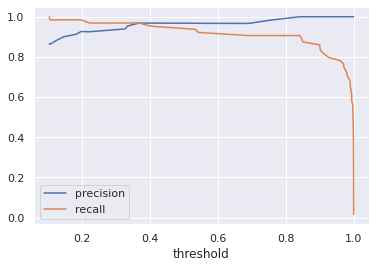

In [81]:
# importa el metodo que nos permite encontrar la curva de precisión y recall
from sklearn.metrics import precision_recall_curve  ##

# calcula la precision, el recall y los umbrales
prec, rec, thre = precision_recall_curve(y_true=y_train, probas_pred=y_proba[:,1])  # Nota: seleccionamos solo la segunda columna, corresponde a la clase 1

# haz un plot de la precision y el recall en función de los umbrales
plt.plot(thre, prec[:-1], label='precision')
plt.plot(thre, rec[:-1], label='recall')
plt.legend(loc='best')
plt.xlabel('threshold')
plt.plot()

Text(0.5, 1.0, 'Precision-Recall curve')

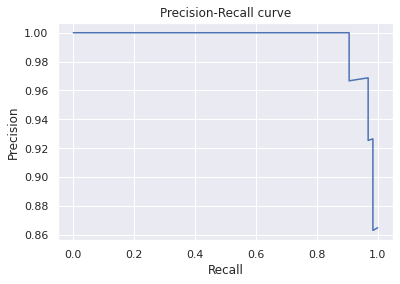

In [82]:
# plotea la precisión en funcion del recall
plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')

### ROC Curve

De forma similar a la curva de precision-recall, la curva ROC (*Receiver Operating Characteristic*) es otra herramienta típica usada en clasificadores binarios.

A diferencia de la curva PR, la curva ROC compara el True Positive Rate (Recall) y el False Positive Rate (1 - specifity). Recuerda que la *specifity* es el True Negative Rate, el ratio de veces que la clase negativa se clasifica correctamente.

Otra forma de comparar clasificadores es comparando el area bajo la curva ROC (Area Under the Curve, AUC). Éste parametro tiene cómo límite superior 1, mientras que un valor de 0.5 corresponde a un clasificador completamente aleatorio.

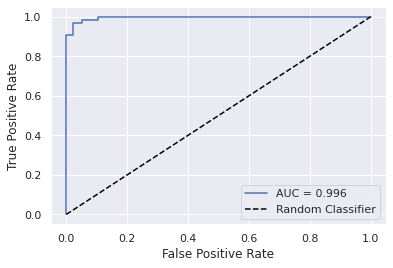

In [87]:
## Repite el ejercicio anterior pero con la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

# Nota: seleccionamos solo la segunda columna, corresponde a la clase 1 en y_proba
fpr, tpr, thre = roc_curve(y_train, y_proba[:,1])  ##
roc_auc = roc_auc_score(y_train, y_proba[:,1])  ##

plt.plot(fpr, tpr, label='AUC = {a}'.format(a=round(roc_auc, 3)))
plt.plot([0, 1], '--', c='black', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

Debido a que la curva ROC y la Prec vs Recall son muy parecidas, uno puede tener dudas al tener que elegir una de ellas. Cómo guía no exhaustiva, uno puede decantarse en función del problema que tenga. Concretamente, en casos no balanceados o cuando una clase nos importa más que la otra, la curva PR nos aportará más información que la curva ROC.


## Mini Ejercicio

En el fichero `data/credicard.csv` encontraremos un dataset sobre transacciones de tarjetas de credito. El objetivo es entrenar un modelo y evaluar su rendimiento para detectar los usos fraudulentos utilizando las métricas descritas anteriormente:

1. Carga los datos en un df de pandas

1. Comprueba rapidamente la distribucion de los datos (head, y describe)
    1. Cómo sabemos que es un problema no balanceado ?
    
1. Separa el df en train y test con un 20% de los datos en test
    1. Comprueba que y_train e y_test tienen una proporción similar de clases 0 y 1

1. Inicializa una regresion logistica con 'liblinear' como solver
1. Inicializa un Random Forest con `n_estimators=30`
1. Inicializa un k-fold stratificado con un numero de splits = 3: `from sklearn.model_selection import StratifiedKFold`
1. Utiliza la funcion `cross_val_predict` sobre el punto anterior y la regresion logística: `from sklearn.model_selection import cross_val_predict`
1. Obtén los valores de las métricas de clasificación descritas anteriormente para evaluar los modelos. Qué modelo se comporta mejor ?
 

## Solución mini ejercicio

Nota: vuelvo a importar todas las funciones y paquetes para conseguir independencia a partir de este punto 
respecto de las celdas anteriores

1. Carga los datos en un df de pandas

In [90]:
import pandas as pd
import numpy as np

In [102]:
df = pd.read_csv('data/creditcard.csv')

2. Comprueba rapidamente la distribucion de los datos (head, y describe)

    1. Cómo sabemos que es un problema no balanceado ?
    

In [103]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,78823.0,-0.968847,1.330711,1.244983,1.456440,-0.430245,-0.255326,0.373425,0.423207,-0.493631,...,0.052182,0.399995,0.045530,0.627451,-0.116213,-0.263948,0.195760,0.130024,29.68,0
1,159447.0,2.068237,0.119307,-1.671769,0.447288,0.312053,-0.954658,0.146459,-0.208987,0.577810,...,-0.365032,-0.974555,0.360158,0.622201,-0.291979,0.167326,-0.066394,-0.030777,1.29,0
2,131307.0,1.914044,-0.924411,-0.196585,0.222221,-0.737681,0.718213,-1.106332,0.294056,2.287637,...,-0.087258,0.019354,0.162138,0.053170,-0.267564,-0.023381,0.036293,-0.026333,52.00,0
3,142751.0,0.204359,1.188141,0.097552,1.036841,0.767623,-0.215636,0.727098,-0.158858,-0.783536,...,-0.261813,-0.574198,-0.011498,0.530138,-0.726085,0.581594,0.171501,0.203013,2.69,0
4,83886.0,1.119377,0.172291,0.128569,0.963394,-0.053382,-0.418732,0.219798,-0.111494,-0.347000,...,0.097055,0.195532,-0.207797,0.028525,0.701166,-0.332946,0.002852,0.017578,59.20,0
5,53122.0,-1.715228,1.476880,1.150552,2.427501,0.045801,1.032506,0.391818,0.538053,-1.064795,...,0.244496,0.476681,-0.003271,-0.832590,-0.348669,-0.091207,-0.556606,0.068819,88.81,0
6,144173.0,-0.248242,0.950486,0.247770,-0.725559,0.386958,-0.897690,0.860687,-0.042141,-0.085116,...,-0.236128,-0.482022,0.077751,0.061699,-0.487893,0.120526,0.349504,0.150066,1.79,0
7,141447.0,-0.225998,-0.907527,2.203257,-1.077494,-1.389251,0.370586,-1.549398,0.393128,-2.201053,...,-0.047886,0.094017,-0.140987,-0.465093,-0.241902,0.304792,0.137749,0.085163,13.68,0
8,79109.0,1.152804,-0.081491,0.401910,1.252775,-0.475921,-0.308661,-0.108146,0.035307,0.779554,...,-0.284434,-0.810790,-0.047800,-0.180109,0.513166,-0.493220,0.018939,0.025181,46.91,0
9,158503.0,-0.689542,1.408663,0.239317,1.191910,0.139965,-0.779165,0.706988,0.094163,-1.198677,...,0.310711,0.863679,-0.436847,0.044233,0.751692,0.464173,-0.025733,0.021075,58.77,0


In [105]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57060.000000,57060.000000,57060.000000,57060.000000,57060.000000,57060.000000,57060.000000,57060.000000,57060.000000,57060.000000,...,57060.000000,57060.000000,57060.000000,57060.000000,57060.000000,57060.000000,57060.000000,57060.000000,57060.000000,57060.000000
mean,94771.575745,-0.007868,0.009697,-0.015515,0.009911,-0.001789,-0.001751,-0.000653,0.002372,-0.000175,...,0.005821,-0.002851,0.002122,0.001299,0.001410,0.000375,0.001013,-0.001557,89.009411,0.003453
std,47446.707109,1.972362,1.666217,1.562612,1.430714,1.445277,1.359269,1.328242,1.200784,1.093453,...,0.747438,0.725611,0.620435,0.604297,0.518103,0.482228,0.414603,0.307454,275.915287,0.058657
min,0.000000,-46.855047,-63.344698,-48.325589,-5.600607,-113.743307,-20.054615,-43.557242,-50.688419,-13.320155,...,-22.797604,-10.933144,-27.533643,-2.765519,-7.025783,-2.534330,-9.390980,-15.430084,0.000000,0.000000
25%,54083.000000,-0.923044,-0.589600,-0.904086,-0.839508,-0.689672,-0.773912,-0.546262,-0.207416,-0.635354,...,-0.228814,-0.545935,-0.161385,-0.354001,-0.314252,-0.325286,-0.071156,-0.053670,5.550000,0.000000
50%,84815.000000,0.016310,0.074846,0.174647,-0.015125,-0.053959,-0.278423,0.044841,0.023920,-0.049041,...,-0.029597,0.005419,-0.011499,0.042454,0.020013,-0.052538,0.000761,0.010700,21.900000,0.000000
75%,139234.750000,1.313631,0.807271,1.016980,0.752324,0.617179,0.384296,0.573895,0.327736,0.596743,...,0.186711,0.523476,0.147602,0.440730,0.350303,0.242140,0.090255,0.076613,76.900000,0.000000
max,172788.000000,2.454930,22.057729,4.079168,16.715537,29.016124,73.301626,120.589494,19.168327,10.326133,...,27.202839,8.316275,22.528412,4.584549,5.473885,3.415636,31.612198,14.929133,25691.160000,1.000000


In [106]:
df['Class'].mean()

0.0034525061338941464

Al parecer, sólo el 3'45 por mil de las transacciones son fraudulentas. 
Así que el problema está claramente **desbalanceado** a favor de *no fraude*.

3. Separa el df en train y test con un 20% de los datos en test
    1. Comprueba que y_train e y_test tienen una proporción similar de clases 0 y 1

In [124]:
from sklearn.model_selection import train_test_split

np.random.seed(22)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Class'], axis = 1), 
    df['Class'], 
    test_size=0.20,
    stra)

print(y_train.mean(), y_test.mean())

0.0034393620750087627 0.0035050823694356818


4. Inicializa una regresion logistica con 'liblinear' como solver

In [131]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')

5. Inicializa un Random Forest con `n_estimators=30`

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=30)

6. Inicializa un k-fold stratificado con un numero de splits = 3: `from sklearn.model_selection import StratifiedKFold`

In [134]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3)

7. Utiliza la funcion `cross_val_predict` sobre el punto anterior y la regresion logística: `from sklearn.model_selection import cross_val_predict`

In [135]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(estimator=lr, X=X_train, y=y_train, cv=cv)

8. Obtén los valores de las métricas de clasificación descritas anteriormente para evaluar los modelos. Qué modelo se comporta mejor ?

In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)

In [137]:
def plot_confusion_matrix(cm, labels=['0', '1']):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues')

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    if labels:
        ax.xaxis.set_ticklabels(labels)
        ax.yaxis.set_ticklabels(labels)

    ax.set_title('Confusion Matrix')

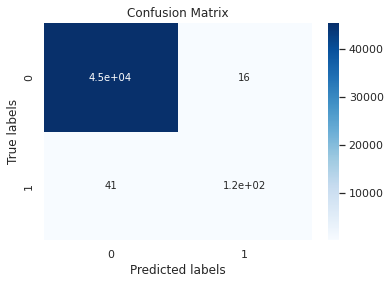

In [138]:
plot_confusion_matrix(cm)

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_train, y_pred))
print("Precision:", precision_score(y_train, y_pred))
print("Recall:", recall_score(y_train, y_pred))
print("F1:", f1_score(y_train, y_pred))

Accuracy: 0.9987513144058885
Precision: 0.8787878787878788
Recall: 0.7388535031847133
F1: 0.8027681660899653


Done!